Вариант №10

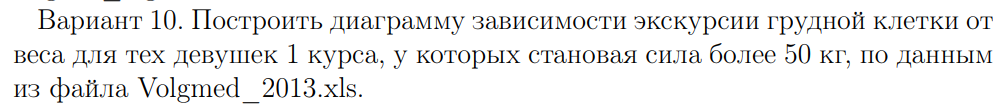

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
# подгружаем данные, учитывая, что названия колонок находятся во второй строке файла
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Анализ данных на Python/Volgmed_2013.xlsx', header=1)
data

,№ п/п,Пол,Год рождения,Факультет,Курс,Группа,Год поступления,Дата обследования,"Рост, см","Вес, кг",...,"Гибкость, см","Время 10 хлопков, с","Прыжок в длину с места, см","Челночный бег, с","Силовой норматив, ед","Бег 100 м, с","Бег 2-3 км, мин","Статическая выносливость, с","Задержка дыхания, с","Равновесие, с"
0,104.0,жен,1981.0,лечебный,1.0,NaN,1999,2000-05-01,176,74.5,...,22,6.6,155,26,38,17.7,8.7,140,59.0,90.0
1,104.0,жен,1981.0,лечебный,3.0,NaN,1999,2002-05-01,176,74,...,23,6.5,158,25,47,18.7,6.58,144,68.0,90.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-05-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-05-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-05-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-05-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# оставляем только нужные данные, удаляем строки с отсутствующими данными
data_cut = data[['Курс', 'Пол', 'Становая сила, кг', 'Вес, кг', 'Экскурсия грудной клетки, см']]
data_cut = data_cut.dropna(axis=0, how='any')
data_cut.info()

# смотрим уникальные значения для курса и пола для правильного составления критериев отбора данных
k = data_cut['Пол'].values
print(np.unique(k, return_index=False))

k = data_cut['Курс'].values
print(np.unique(k, return_index=False))

<class 'pandas.core.frame.DataFrame'>
Index: 2507 entries, 0 to 4275
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Курс                          2507 non-null   float64
 1   Пол                           2507 non-null   object 
 2   Становая сила, кг             2507 non-null   object 
 3   Вес, кг                       2507 non-null   object 
 4   Экскурсия грудной клетки, см  2507 non-null   float64
dtypes: float64(2), object(3)
memory usage: 117.5+ KB
['жен' 'жен.' 'муж' 'муж.']
[1. 2. 3. 4.]


In [86]:
# 1 курс, женский пол
data_cut = data_cut[((data_cut['Пол'] == 'жен') | (data_cut['Пол'] == 'жен.')) & (data_cut['Курс'] == 1)]
data_cut.head(5)

,Курс,Пол,"Становая сила, кг","Вес, кг","Экскурсия грудной клетки, см"
0,1.0,жен,50,74.5,6.0
8,1.0,жен,45,61,8.0
11,1.0,жен,50,57,8.0
14,1.0,жен,60,51,8.0
17,1.0,жен,55,52,5.0


In [87]:
# Столбец становая сила имеет тип object, смотрим уникальные значения, чтобы исключить машающие для преобразования в тип float
data_cut['Становая сила, кг'].value_counts()

,count
"Становая сила, кг",
50,126
60,86
55,81
75,57
65,54
70,53
45,48
40,42
30,23


In [88]:
# убираем строки, где становая = осв., преобразуем в float
data_cut = data_cut[data_cut['Становая сила, кг'] != 'осв.']
data_cut['Становая сила, кг'] = data_cut['Становая сила, кг'].astype('float')

# становая сила > 50
data_cut = data_cut[data_cut['Становая сила, кг'] > 50]

# проверка
data_cut['Становая сила, кг'].value_counts()

,count
"Становая сила, кг",
60.0,86
55.0,81
75.0,57
65.0,54
70.0,53
80.0,19
85.0,12
52.0,12
57.0,11


<Axes: xlabel='Вес, кг', ylabel='Экскурсия грудной клетки, см'>

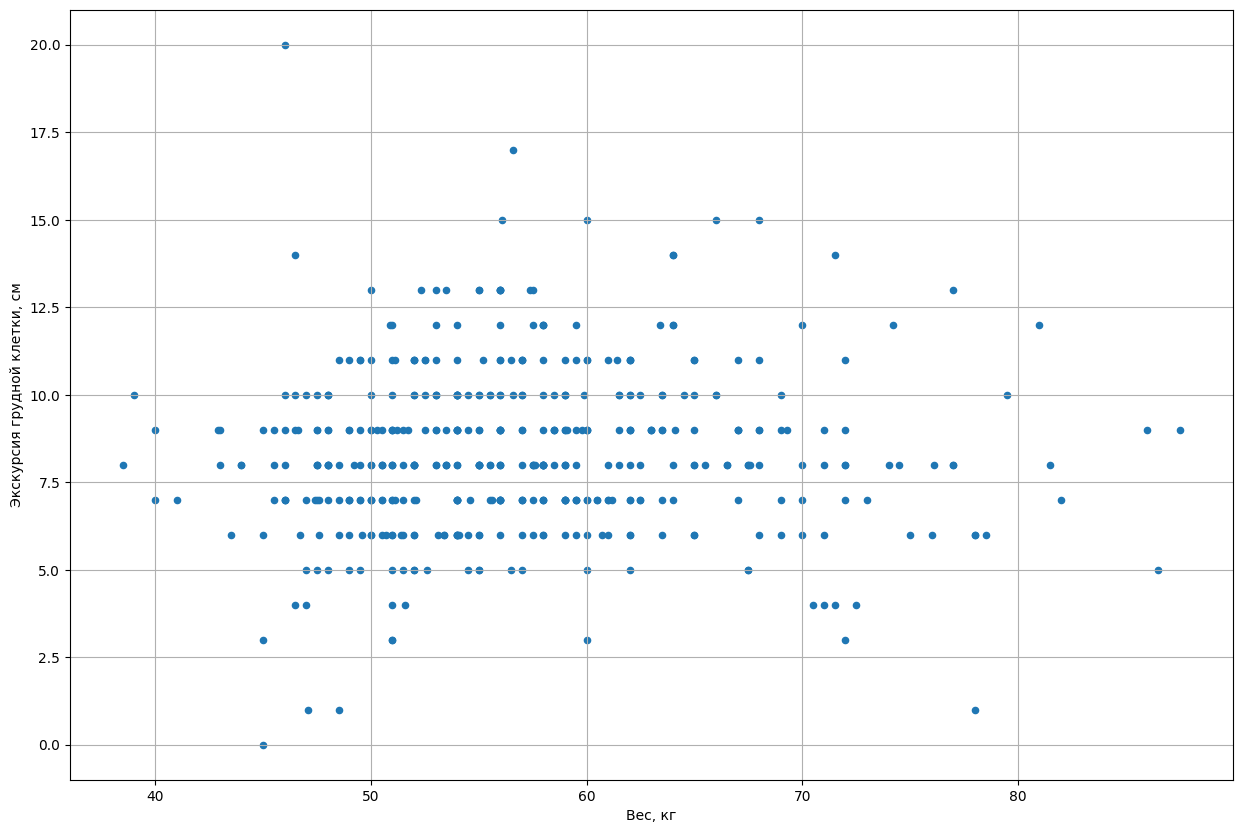

In [89]:
# строим диаграмму рассеяния экскурсии грудной клетки от веса
data_cut.plot(kind='scatter', x='Вес, кг', y='Экскурсия грудной клетки, см', figsize=(15, 10), grid=True)

<Axes: xlabel='Вес, кг'>

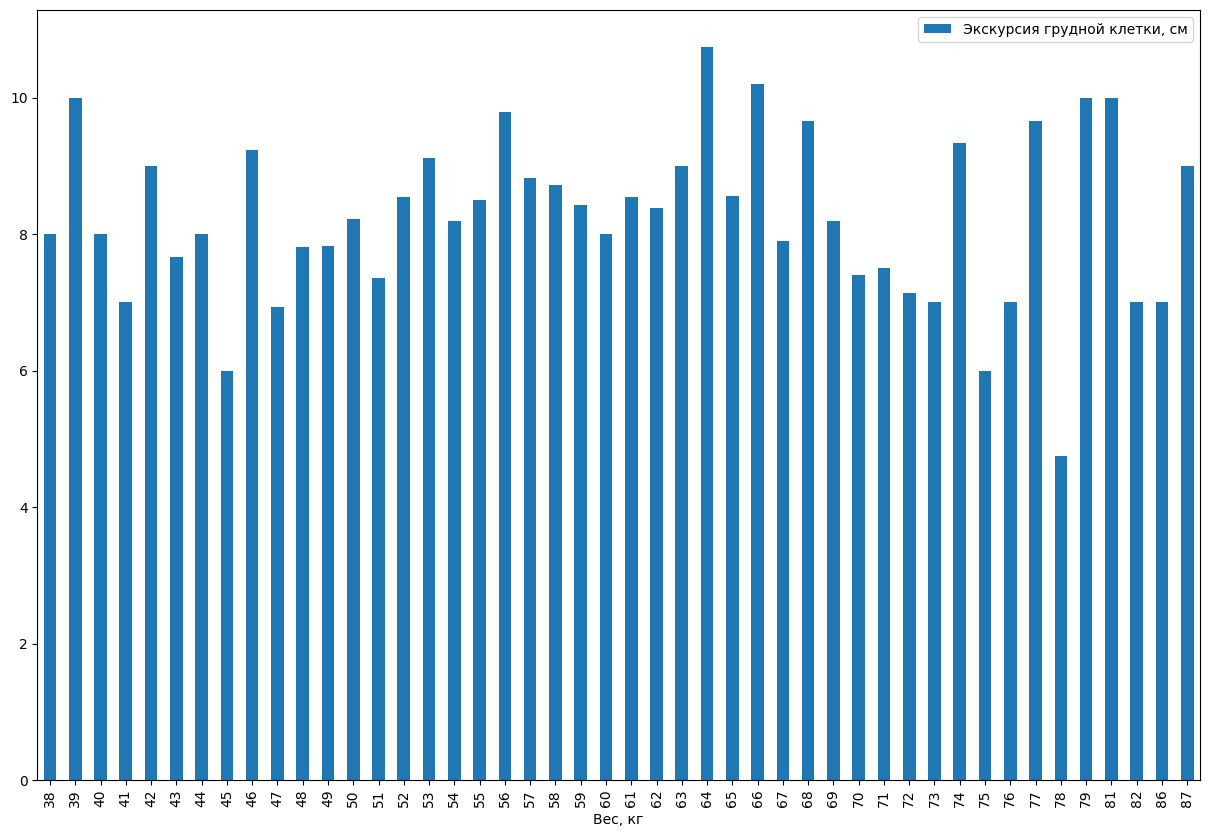

In [90]:
# для наглядности, построим также столбчатую диаграмму по средним сначениям экскурсии грудной клетки по каждому занчению веса
data_cut['Вес, кг'] = data_cut['Вес, кг'].astype('int')
bar_data = data_cut.groupby('Вес, кг')['Экскурсия грудной клетки, см'].mean()
bar_data.plot(kind='bar', x='Вес, кг', y='Экскурсия грудной клетки, см', figsize=(15, 10), legend=True)